In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [3]:
# Load data
df = pd.read_csv('./Merged_data/AAPL.csv')
df.head()

,SYM_ROOT,DATE,pre_market_volume,post_market_volume,DAY_OF_WEEK,OPEN,HIGH,LOW,CLOSE,VOLUME,DIFF_O&C,DIFF_H&L,PREV_POST_MARKET_VOLUME
0,AAPL,2019-01-03,8702037.0,9788893.0,Thursday,34.379961,34.795445,33.907172,33.952541,365248800.0,-0.427420,0.888273,10818374.0
1,AAPL,2019-01-04,3011205.0,9747041.0,Friday,34.511292,35.471200,34.336981,35.401951,234428400.0,0.890659,1.134219,9788893.0
2,AAPL,2019-01-07,1613404.0,6495477.0,Monday,35.507018,35.538061,34.838425,35.323154,219111200.0,-0.183864,0.699636,9747041.0
3,AAPL,2019-01-08,1997698.0,5557865.0,Tuesday,35.712369,36.252020,35.464036,35.996521,164101200.0,0.284152,0.787984,6495477.0
4,AAPL,2019-01-09,2461012.0,4722655.0,Wednesday,36.125457,36.899115,35.729080,36.607800,180396400.0,0.482342,1.170035,5557865.0


In [4]:
# Scale volume features (only PREV_POST_MARKET_VOLUME and pre_market_volume)
scaler = StandardScaler()
volume_cols = ['PREV_POST_MARKET_VOLUME', 'pre_market_volume']
df[volume_cols] = scaler.fit_transform(df[volume_cols])

df.head()

,SYM_ROOT,DATE,pre_market_volume,post_market_volume,DAY_OF_WEEK,OPEN,HIGH,LOW,CLOSE,VOLUME,DIFF_O&C,DIFF_H&L,PREV_POST_MARKET_VOLUME
0,AAPL,2019-01-03,4.131819,9788893.0,Thursday,34.379961,34.795445,33.907172,33.952541,365248800.0,-0.427420,0.888273,1.758289
1,AAPL,2019-01-04,0.823094,9747041.0,Friday,34.511292,35.471200,34.336981,35.401951,234428400.0,0.890659,1.134219,1.370267
2,AAPL,2019-01-07,0.010394,6495477.0,Monday,35.507018,35.538061,34.838425,35.323154,219111200.0,-0.183864,0.699636,1.354492
3,AAPL,2019-01-08,0.233827,5557865.0,Tuesday,35.712369,36.252020,35.464036,35.996521,164101200.0,0.284152,0.787984,0.128943
4,AAPL,2019-01-09,0.503204,4722655.0,Wednesday,36.125457,36.899115,35.729080,36.607800,180396400.0,0.482342,1.170035,-0.224453


In [5]:
df.columns

Index(['SYM_ROOT', 'DATE', 'pre_market_volume', 'post_market_volume',
       'DAY_OF_WEEK', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME', 'DIFF_O&C',
       'DIFF_H&L', 'PREV_POST_MARKET_VOLUME'],
      dtype='object')

In [6]:
selected_features = ['DATE', 'pre_market_volume', 'PREV_POST_MARKET_VOLUME', 'DAY_OF_WEEK', 'DIFF_O&C']
df_selected = df[selected_features]
df_selected.head()

,DATE,pre_market_volume,PREV_POST_MARKET_VOLUME,DAY_OF_WEEK,DIFF_O&C
0,2019-01-03,4.131819,1.758289,Thursday,-0.427420
1,2019-01-04,0.823094,1.370267,Friday,0.890659
2,2019-01-07,0.010394,1.354492,Monday,-0.183864
3,2019-01-08,0.233827,0.128943,Tuesday,0.284152
4,2019-01-09,0.503204,-0.224453,Wednesday,0.482342


In [7]:
# Encode categorical features (DAY_OF_WEEK) using one-hot encoding
df_selected = pd.get_dummies(df_selected, columns=['DAY_OF_WEEK'], drop_first=True)

In [8]:
df_selected.head()

,DATE,pre_market_volume,PREV_POST_MARKET_VOLUME,DIFF_O&C,DAY_OF_WEEK_Monday,DAY_OF_WEEK_Thursday,DAY_OF_WEEK_Tuesday,DAY_OF_WEEK_Wednesday
0,2019-01-03,4.131819,1.758289,-0.427420,False,True,False,False
1,2019-01-04,0.823094,1.370267,0.890659,False,False,False,False
2,2019-01-07,0.010394,1.354492,-0.183864,True,False,False,False
3,2019-01-08,0.233827,0.128943,0.284152,False,False,True,False
4,2019-01-09,0.503204,-0.224453,0.482342,False,False,False,True


In [9]:
df_selected.columns

Index(['DATE', 'pre_market_volume', 'PREV_POST_MARKET_VOLUME', 'DIFF_O&C',
       'DAY_OF_WEEK_Monday', 'DAY_OF_WEEK_Thursday', 'DAY_OF_WEEK_Tuesday',
       'DAY_OF_WEEK_Wednesday'],
      dtype='object')

In [10]:
df_selected = df_selected.set_index('DATE').sort_index()  # Ensure datetime index

In [11]:
df_selected.columns

Index(['pre_market_volume', 'PREV_POST_MARKET_VOLUME', 'DIFF_O&C',
       'DAY_OF_WEEK_Monday', 'DAY_OF_WEEK_Thursday', 'DAY_OF_WEEK_Tuesday',
       'DAY_OF_WEEK_Wednesday'],
      dtype='object')

In [12]:
# Time-based split (last 20% as test)
split_idx = int(len(df) * 0.8)
train = df_selected.iloc[:split_idx]
test = df_selected.iloc[split_idx:]

In [32]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, 2019-01-03 to 2019-04-30
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pre_market_volume        81 non-null     float64
 1   PREV_POST_MARKET_VOLUME  81 non-null     float64
 2   DIFF_O&C                 81 non-null     float64
 3   DAY_OF_WEEK_Monday       81 non-null     bool   
 4   DAY_OF_WEEK_Thursday     81 non-null     bool   
 5   DAY_OF_WEEK_Tuesday      81 non-null     bool   
 6   DAY_OF_WEEK_Wednesday    81 non-null     bool   
dtypes: bool(4), float64(3)
memory usage: 2.8+ KB


## Correlation

In [13]:
correlations = df_selected.corr(method='pearson')
print(correlations['DIFF_O&C'].sort_values(ascending=False).to_string())

DIFF_O&C                   1.000000
DAY_OF_WEEK_Wednesday      0.151694
DAY_OF_WEEK_Monday         0.077330
PREV_POST_MARKET_VOLUME    0.075967
pre_market_volume         -0.006434
DAY_OF_WEEK_Tuesday       -0.110959
DAY_OF_WEEK_Thursday      -0.116286


## Linear Regression:

In [14]:
df_selected.columns

Index(['pre_market_volume', 'PREV_POST_MARKET_VOLUME', 'DIFF_O&C',
       'DAY_OF_WEEK_Monday', 'DAY_OF_WEEK_Thursday', 'DAY_OF_WEEK_Tuesday',
       'DAY_OF_WEEK_Wednesday'],
      dtype='object')

In [15]:
from sklearn.linear_model import LinearRegression

# Define features and target
features = ['PREV_POST_MARKET_VOLUME', 'pre_market_volume', 
            'DAY_OF_WEEK_Monday', 'DAY_OF_WEEK_Thursday', 
            'DAY_OF_WEEK_Tuesday', 'DAY_OF_WEEK_Wednesday',
            ]
target = 'DIFF_O&C'

# Fit model
lr = LinearRegression()
lr.fit(train[features], train[target])

# Predict
lr_pred = lr.predict(test[features])

In [16]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(test[target], lr_pred)
mae = mean_absolute_error(test[target], lr_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Mean Squared Error: 0.16
Mean Absolute Error: 0.32


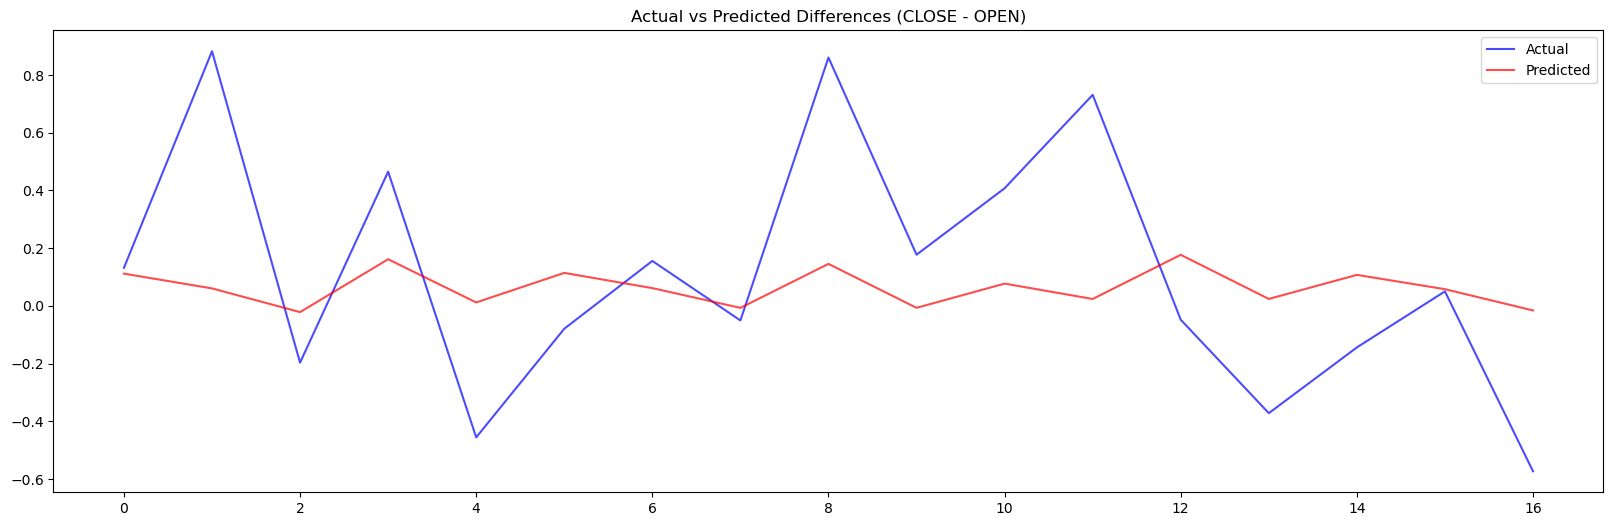

In [17]:
# Plot actual vs predicted differences
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.plot(test[target].values, label="Actual", color='blue', alpha=0.7)
plt.plot(lr_pred, label="Predicted", color='red', alpha=0.7)
plt.legend()
plt.title("Actual vs Predicted Differences (CLOSE - OPEN)")
plt.show()

In [18]:
(test[target], lr_pred)

(DATE
 2019-04-05    0.131895
 2019-04-08    0.882492
 2019-04-09   -0.196643
 2019-04-10    0.465226
 2019-04-11   -0.455635
 2019-04-12   -0.079137
 2019-04-15    0.155873
 2019-04-16   -0.050361
 2019-04-17    0.860910
 2019-04-18    0.177459
 2019-04-22    0.407671
 2019-04-23    0.731412
 2019-04-24   -0.047961
 2019-04-25   -0.371702
 2019-04-26   -0.143882
 2019-04-29    0.050361
 2019-04-30   -0.573139
 Name: DIFF_O&C, dtype: float64,
 array([ 0.11183098,  0.0606672 , -0.02149915,  0.1617166 ,  0.01206615,
         0.11438003,  0.06172905, -0.00677731,  0.1456313 , -0.00670302,
         0.0772957 ,  0.02403027,  0.17708455,  0.02417365,  0.10753173,
         0.05796972, -0.01571821]))

## SARIMAX

In [19]:
print(df_selected.dtypes)

pre_market_volume          float64
PREV_POST_MARKET_VOLUME    float64
DIFF_O&C                   float64
DAY_OF_WEEK_Monday            bool
DAY_OF_WEEK_Thursday          bool
DAY_OF_WEEK_Tuesday           bool
DAY_OF_WEEK_Wednesday         bool
dtype: object


In [20]:
# Convert one-hot encoded days to integers
day_columns = ['DAY_OF_WEEK_Monday', 'DAY_OF_WEEK_Thursday', 
               'DAY_OF_WEEK_Tuesday', 'DAY_OF_WEEK_Wednesday']
train[day_columns] = train[day_columns].astype(int)
test[day_columns] = test[day_columns].astype(int)

C:\Users\usith\AppData\Local\Temp\ipykernel_32856\4154584696.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[day_columns] = train[day_columns].astype(int)
C:\Users\usith\AppData\Local\Temp\ipykernel_32856\4154584696.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[day_columns] = test[day_columns].astype(int)


In [21]:
print(train.dtypes)

pre_market_volume          float64
PREV_POST_MARKET_VOLUME    float64
DIFF_O&C                   float64
DAY_OF_WEEK_Monday           int32
DAY_OF_WEEK_Thursday         int32
DAY_OF_WEEK_Tuesday          int32
DAY_OF_WEEK_Wednesday        int32
dtype: object


In [22]:
import statsmodels.api as sm

# Fit SARIMAX (adjust order/seasonal_order based on your data)
model = sm.tsa.SARIMAX(
    train[target],
    exog=train[features],
    order=(1, 0, 1),          # ARIMA order (p,d,q)
    seasonal_order=(1, 0, 1, 5)  # Seasonal parameters (P,D,Q,s)
)
results = model.fit(disp=False)

# Forecast
sarimax_pred = results.get_forecast(steps=len(test), exog=test[features]).predicted_mean

c:\Users\usith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\usith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\usith\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\usith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\usith\anaconda3\Lib\sit

In [23]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(test[target], sarimax_pred)
mae = mean_absolute_error(test[target], sarimax_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Mean Squared Error: 0.15
Mean Absolute Error: 0.30


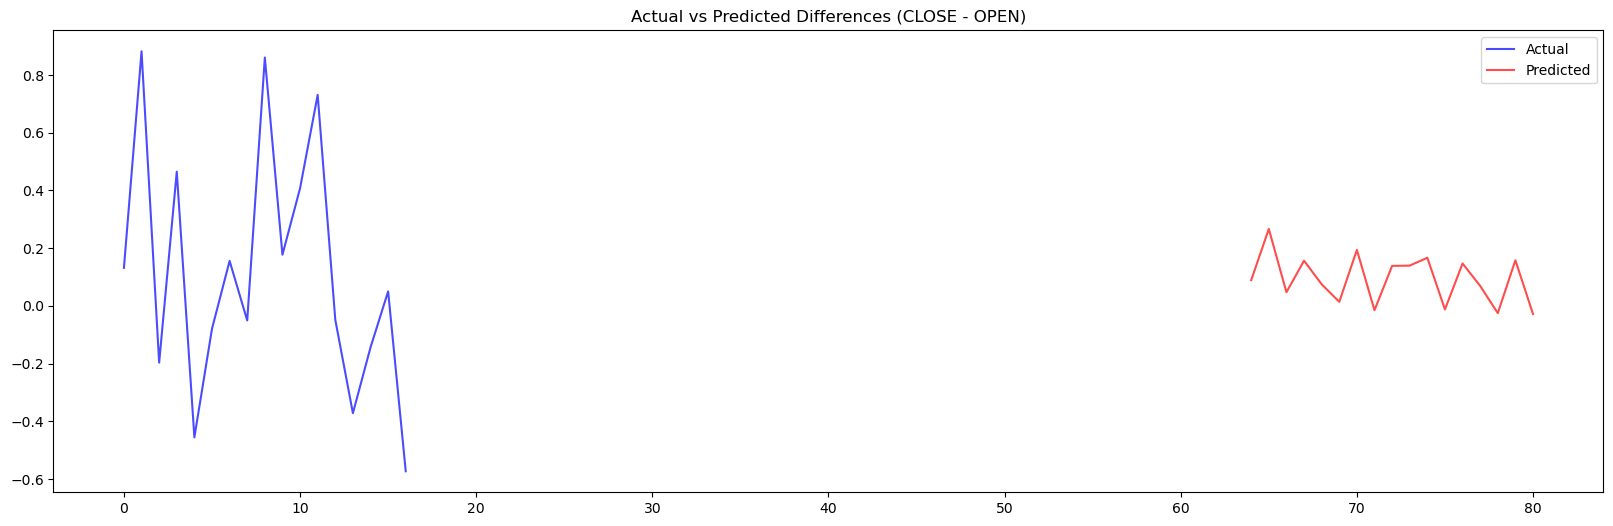

In [24]:
# Plot actual vs predicted differences
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.plot(test[target].values, label="Actual", color='blue', alpha=0.7)
plt.plot(sarimax_pred, label="Predicted", color='red', alpha=0.7)
plt.legend()
plt.title("Actual vs Predicted Differences (CLOSE - OPEN)")
plt.show()

## XGBoost

In [25]:
from xgboost import XGBRegressor

# Train model
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb.fit(train[features], train[target])

# Predict
xgb_pred = xgb.predict(test[features])

In [26]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(test[target], xgb_pred)
mae = mean_absolute_error(test[target], xgb_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Mean Squared Error: 0.39
Mean Absolute Error: 0.42


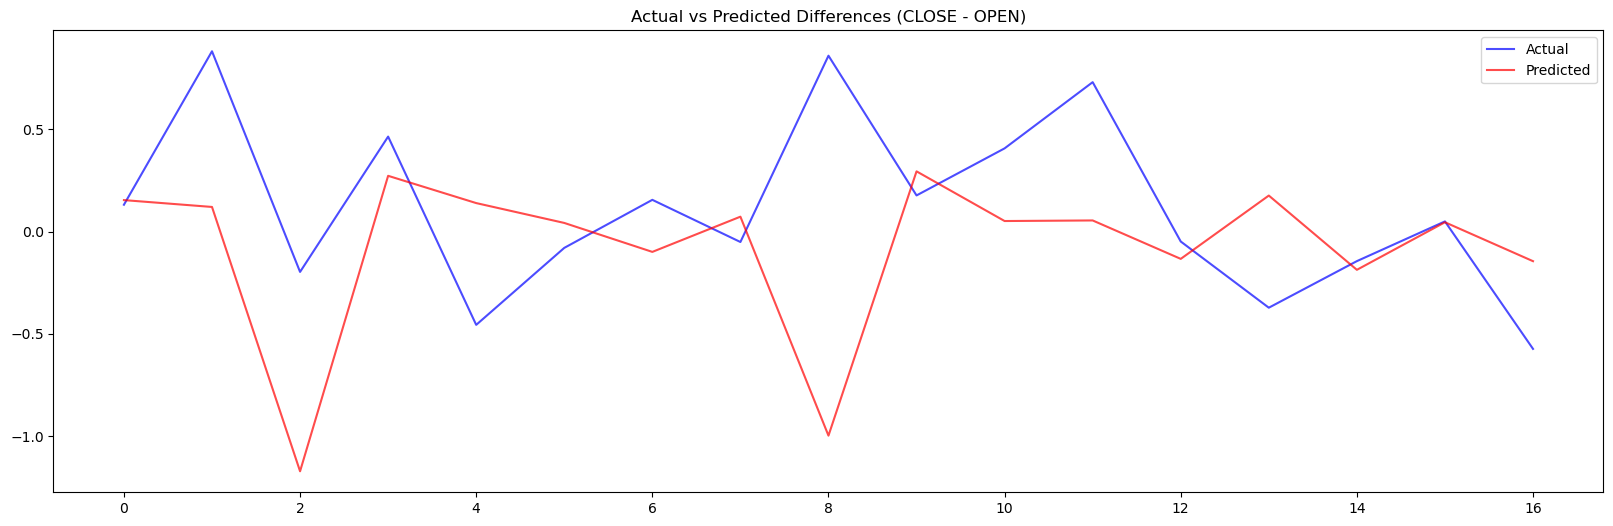

In [27]:
# Plot actual vs predicted differences
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.plot(test[target].values, label="Actual", color='blue', alpha=0.7)
plt.plot(xgb_pred, label="Predicted", color='red', alpha=0.7)
plt.legend()
plt.title("Actual vs Predicted Differences (CLOSE - OPEN)")
plt.show()

In [28]:
# Create a DataFrame to compare actual vs. predicted values
results_df = pd.DataFrame({
    'Actual': test[target],
    'Predicted': xgb_pred
}, index=test.index)  # Preserve the datetime index if available

results_df

,Actual,Predicted
DATE,,
2019-04-05,0.131895,0.154575
2019-04-08,0.882492,0.121082
2019-04-09,-0.196643,-1.171755
2019-04-10,0.465226,0.273360
2019-04-11,-0.455635,0.140026
2019-04-12,-0.079137,0.042902
2019-04-15,0.155873,-0.098743
2019-04-16,-0.050361,0.073509
2019-04-17,0.860910,-0.997405


## LSTM

In [36]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape data for LSTM [samples, timesteps, features]
look_back = 5  # Adjust based on your window
X_train = train[features].values
y_train = train[target].values

# Reshape to (samples, look_back, n_features)
X_train_lstm = np.array([X_train[i-look_back:i] for i in range(look_back, len(X_train))])
y_train_lstm = y_train[look_back:]

# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(look_back, len(features))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train
model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=3)

# Prepare test data for LSTM
X_test_lstm = np.array([test[features].values[i-look_back:i] for i in range(look_back, len(test))])
y_test_lstm = test[target].values[look_back:]
lstm_pred = model.predict(X_test_lstm).flatten()

Epoch 1/50


c:\Users\usith\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1967
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1527 
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2345 
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1946 
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1446 
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1752 
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1529 
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1632 
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1728 
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1681 
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2250 
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1737 
Epoch 13/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1936 
Epoch 14/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1283 
Epoch 15/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1251 
Epoch 16/50
20/2

In [37]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test_lstm, lstm_pred)
mae = mean_absolute_error(y_test_lstm, lstm_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Mean Squared Error: 0.18
Mean Absolute Error: 0.36


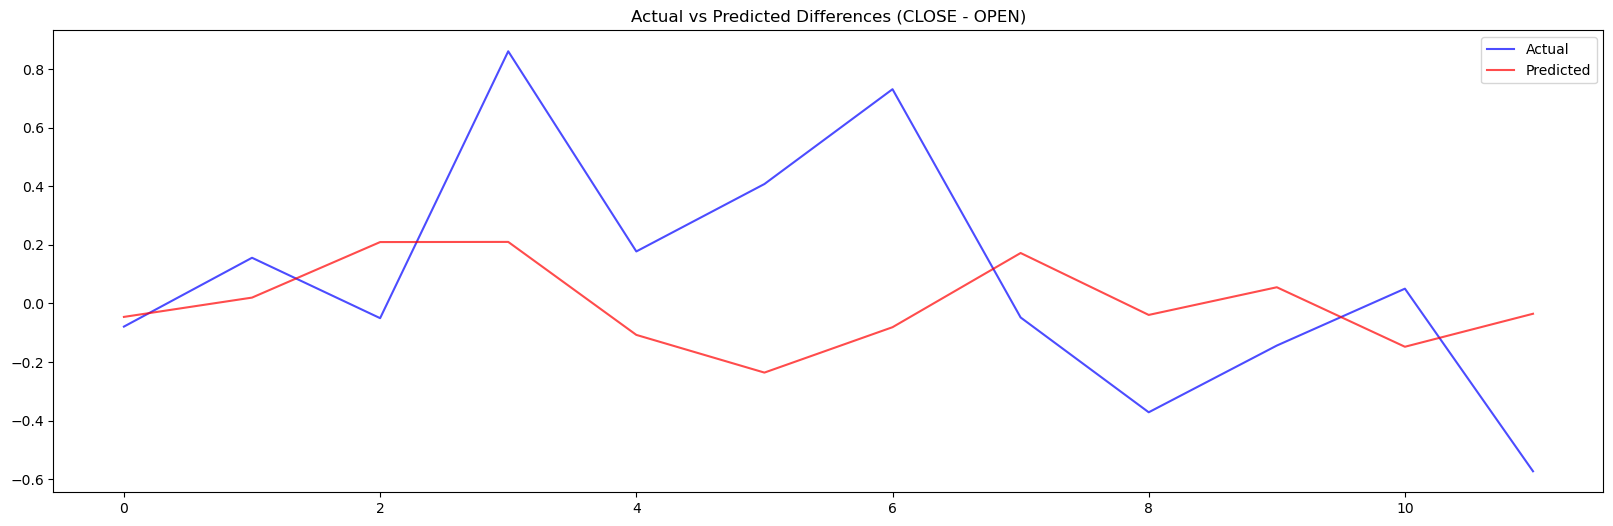

In [38]:
# Plot actual vs predicted differences
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.plot(y_test_lstm, label="Actual", color='blue', alpha=0.7)
plt.plot(lstm_pred, label="Predicted", color='red', alpha=0.7)
plt.legend()
plt.title("Actual vs Predicted Differences (CLOSE - OPEN)")
plt.show()

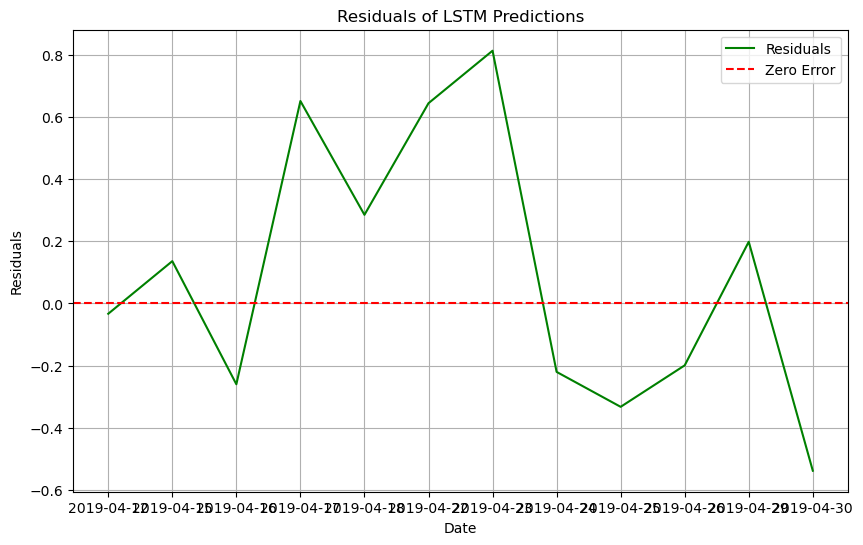

In [39]:
# Calculate residuals
residuals = y_test_lstm - lstm_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(test.index[look_back:], residuals, label='Residuals', color='green')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Error')
plt.title('Residuals of LSTM Predictions')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.grid()
plt.show()